# <font color="darkblue"> Prática 01: Classificação Linear - Regressão Logística </font>

**Objetivos:**


*   Implementar o modelo linear de *Regressão Logística*
*   Comparar seu resultado de classificiação linear com o LRClassifier

**Requisitos de execução:**


*   Upload dos arquivos *random_input.py*, *linearregression.py* e *lrclassifier.py*

**Atividade 1:**

1. Gere $N=100$ pontos aleatórios com rótulos de classificação utilizando a classe RandomInput da Aula 14;

    

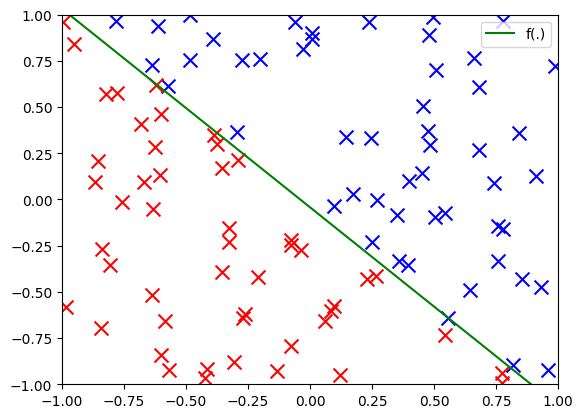

In [1]:
from random_input import RandomInput, draw
    
N = 100
rIN = RandomInput()
_X, _y = rIN.get_linear_input(N)
    
draw(_X, _y, rIN)

**Atividade 2:**

Implemente a *Regressão Logística* com o algoritmo *Gradiente Descendente*:

1. $w(0)=0$; $\eta = 0.1$;
2. **Para** $t=0,1,2..,tmax$ **faça**
3. $\quad\quad g_t=-\frac{1}{N}\sum_{n=1}^{N}\frac{y_nx_n}{1+e^{y_nw^T(t)x_n}}$;
4. $\quad\quad$ **Se** $(\lVert g_t \rVert < \epsilon)$ : **break**;
5. $\quad\quad w(t+1) = w(t) - \eta g_t$;
6. Retorne $w$


In [2]:
import numpy as np
from numpy import linalg as LA
import random
from random import sample 


class LogisticRegression_:
    def __init__(self, eta=0.1, tmax=1000, bs=1000000, epsilon=1e-6):
      self.eta = eta
      self.tmax = tmax
      self.batch_size = bs
      self.epsilon = epsilon

    # Infere o vetor w da funçao hipotese
    #Executa a minimizao do erro de entropia cruzada pelo algoritmo gradiente de descida
    def fit(self, _X, _y):
        X = np.array(_X)              
        y = np.array(_y).reshape(-1)  

        N, d = X.shape
        self.w = np.zeros(d)         

        for t in range(self.tmax):
            # Vetor gradiente g_t
            margins = y * (X @ self.w)
            probs = 1 / (1 + np.exp(margins))  # shape: (N,)
            gt = - (1 / N) * np.sum((y[:, np.newaxis] * X) * probs[:, np.newaxis], axis=0)

            # Critério de parada
            if LA.norm(gt) < self.epsilon:
                break

            # Atualização de w
            self.w = self.w - self.eta * gt

    def predict_prob(self, X):
        X = np.array(X)
        return 1 / (1 + np.exp(-X @ self.w))

    def predict(self, X):
        prob = self.predict_prob(X)
        return np.where(prob >= 0.5, 1, -1)  # Consistente com y ∈ {-1, 1}

    def getW(self):
        return self.w

    def getRegressionY(self, regressionX, shift=0):
        return (-self.w[0]+shift - self.w[1]*regressionX) / self.w[2]

**Atividade 3:** 

1. Utilize o algoritmo de *Regressão Logística* para computar a função hipótese $g(x)=\theta(w^Tx)$ inferida sobre os pontos aleatórios gerados;
2. Plote, em um gráfico de dispersão, a probabilidade inferida pelo algoritmo em cada ponto;
3. Utilize a *Regressão Logística* como classificador linear e plote os pontos classificados com bolinha azul(1) e vermelha(0);
4. Compute o erro dentro da amostra gerado pela classificação linear do algoritmo de *Regressão Logistica*.


[0.79415374 0.5188348  0.91862848 0.88197582 0.60247483 0.72728313
 0.03992826 0.41437748 0.11424641 0.0072603  0.97338367 0.8441176
 0.31966426 0.30254179 0.9764299  0.05067607 0.00832125 0.7186356
 0.99719548 0.83176468 0.00343364 0.99604802 0.16395113 0.01089965
 0.9900903  0.46131816 0.00161429 0.53461763 0.0196436  0.99542667
 0.90354372 0.83872933 0.58748512 0.92385141 0.96652955 0.05371791
 0.95163276 0.88363316 0.63377353 0.00588006 0.00469675 0.95003338
 0.9943564  0.96697448 0.61261012 0.44773272 0.00294514 0.29961757
 0.6802472  0.1284128  0.14860257 0.25609059 0.99922321 0.93280175
 0.99920942 0.1101653  0.41892674 0.96639008 0.00995679 0.38984128
 0.1945777  0.60422619 0.55223944 0.99742576 0.07548362 0.96983954
 0.05175842 0.49373843 0.00201025 0.40047548 0.70277928 0.00965215
 0.76172876 0.90575704 0.19366313 0.16701014 0.46616352 0.38588075
 0.26908816 0.99305417 0.98396258 0.95120832 0.08421891 0.1009911
 0.90311729 0.55353073 0.03537237 0.78412859 0.23970427 0.0516580

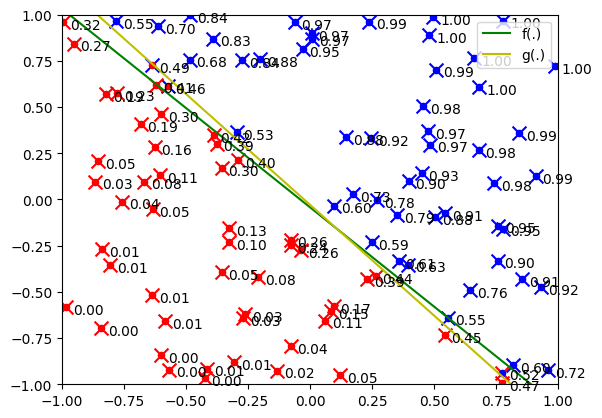

In [3]:
from matplotlib import pyplot as plt

draw(_X, _y, rIN)
rx = [ [1, x[0], x[1]] for x in _X]

#Executar o ajuste dos dados com Regressao Logistica
classifier = LogisticRegression_(0.1, 1000)
classifier.fit(rx, _y)

#Plota as porcentagens da Regressao Logistica 
pred = classifier.predict_prob(rx)
print(pred)

for x, pred_x in zip(_X, pred) :
  plt.annotate("{:.2f}".format(pred_x), xy=(x[0], x[1]), xytext=(5,-5), textcoords='offset points')

#desenha a reta inferida pela regressao logistica
xRL = [-1, +1]
yRL = [classifier.getRegressionY(xRL[0]), classifier.getRegressionY(xRL[1])]
plt.plot(xRL, yRL, 'y-', label='g(.)')
plt.legend(loc='upper right')

#plota os pontos classificados pela RL com bolinha azul(+) e vermelha(-)
xP = [_X[i][0] for i in range(N) if(pred[i] >= 0.5)]
yP = [_X[i][1] for i in range(N) if(pred[i] >= 0.5)]
xN = [_X[i][0] for i in range(N) if(pred[i] < 0.5)]
yN = [_X[i][1] for i in range(N) if(pred[i] < 0.5)]

plt.scatter(xP, yP, color='blue', marker='o', s=20)
plt.scatter(xN, yN, color='red', marker='o', s=20)

#Computando o erro dentro da amostra (Ein)
pred = classifier.predict(rx)

errorIN = 0
for pn, yn in zip(pred, _y):
  if(pn != yn):
    errorIN += 1

print("Error in : " + str(errorIN/N * 100) + "%")


**Atividade 4:**

1. Reproduza o mesmo experimento para o classificador linear com Regressão Linear (*RCClassifier*);
2. Implemente o algoritmo *Gradiente Descendente Estocástico* na classe *LogisticRegression_* e compare os resultados.

Ein = 6.0%


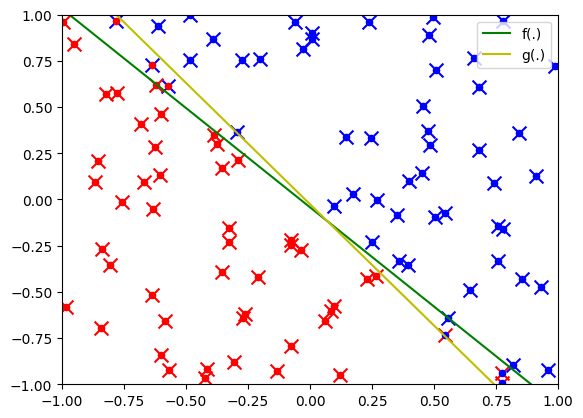

In [4]:
from lrclassifier import LRClassifier

classifier = LRClassifier()
classifier.fit(rx, _y)

draw(_X, _y, rIN)

#desenha a reta inferida pela regressao linear
xRL = [-1, +1]
yRL = [classifier.getRegressionY(xRL[0]), classifier.getRegressionY(xRL[1])]
plt.plot(xRL, yRL, 'y-', label='g(.)')
plt.legend(loc='upper right')

#plota os pontos classificados pela RL com bolinha azul(+) e vermelha(-)
pred = classifier.predict(rx)
xP = [_X[i][0] for i in range(N) if(pred[i] > 0)]
yP = [_X[i][1] for i in range(N) if(pred[i] > 0)]
xN = [_X[i][0] for i in range(N) if(pred[i] < 0)]
yN = [_X[i][1] for i in range(N) if(pred[i] < 0)]

plt.scatter(xP, yP, color='blue', marker='o', s=20)
plt.scatter(xN, yN, color='red', marker='o', s=20)

#Computando o erro dentro da amostra (Ein)
eIn = 0
for i in range(N):
  if(pred[i] != _y[i]):
    eIn += 1
eIn /= N
print("Ein = " + str(eIn * 100) + "%")

Atividade 5:

1. Reproduza o mesmo experimento com a classe LogisticRegression do pacote *sklearn.linear_model*
        from sklearn.linear_model import LogisticRegression

[[0.27026128 0.72973872]
 [0.47343421 0.52656579]
 [0.14750116 0.85249884]
 [0.18937998 0.81062002]
 [0.42273171 0.57726829]
 [0.3275023  0.6724977 ]
 [0.90608756 0.09391244]
 [0.56774808 0.43225192]
 [0.81006615 0.18993385]
 [0.97171488 0.02828512]
 [0.06869469 0.93130531]
 [0.23138654 0.76861346]
 [0.64248145 0.35751855]
 [0.65046053 0.34953947]
 [0.06234007 0.93765993]
 [0.89129493 0.10870507]
 [0.96925692 0.03074308]
 [0.32461129 0.67538871]
 [0.01417606 0.98582394]
 [0.24436601 0.75563399]
 [0.98329494 0.01670506]
 [0.01823498 0.98176502]
 [0.76669043 0.23330957]
 [0.96188226 0.03811774]
 [0.03392589 0.96607411]
 [0.53336118 0.46663882]
 [0.9904083  0.0095917 ]
 [0.47711959 0.52288041]
 [0.94221128 0.05778872]
 [0.01998713 0.98001287]
 [0.16116078 0.83883922]
 [0.23871596 0.76128404]
 [0.43152917 0.56847083]
 [0.13654784 0.86345216]
 [0.08227017 0.91772983]
 [0.88424448 0.11575552]
 [0.10567748 0.89432252]
 [0.19062639 0.80937361]
 [0.39580822 0.60419178]
 [0.97537118 0.02462882]


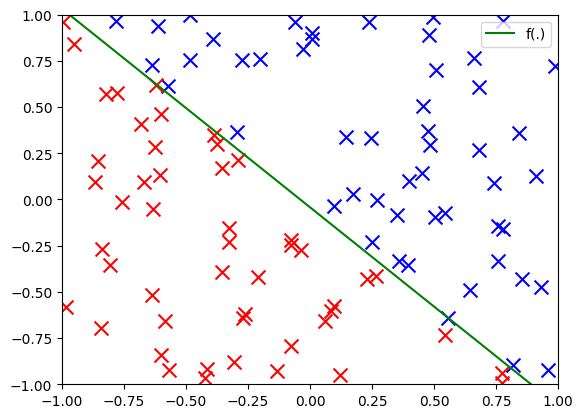

In [6]:
from sklearn.linear_model import LogisticRegression
draw(_X, _y, rIN)

classifier = LogisticRegression(max_iter=1000)
classifier.fit(rx, _y) 

#Plota as porcentagens da Regressao Logistica 
pred = classifier.predict_proba(rx)
print(pred)

#Computando o erro dentro da amostra (Ein)
pred = classifier.predict(rx)
print(pred)

errorIN = 0
for pn, yn in zip(pred, _y):
  if(pn != yn):
    errorIN += 1

print("Error in : " + str(errorIN/N * 100) + "%")
